## 앙상블 학습

## 앙상블 학습 (Ensemble Learning) 개요

### 앙상블 학습을 통한 분류   

- 여러 개의 분류기(Classifier)을 사용해서 예측 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 단일 분류기 사용 때보다 신뢰성이 높은 예측값을 얻을 수 있음
- 쉽고 편하면서도 강력한 성능 보유
- 대부분의 정형 데이터 분류 시 뛰어난 성능을 나타냄
- 이미지, 영상, 음성 등의 비정형 데이터 분류 : 딥러닝 성능 뛰어남

### 대표적인 앙상블 알고리즘
- 랜덤포레스트
- 그레디언트 부스팅

#### 최신 앙상블 알고리즘
- XGBoost 
- LightBGM : XGBoot 예측성능 유사하면서 수행속도 훨씬 빠름
- Stacking : 메타모델 수립

### 앙상블 학습결과(예측) 결합하는 방법

- 보팅(Voting)
- 배깅(Bagging)
- 부스팅(Boosting)

보팅(Voting) : 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합

배깅(Bagging) : 보팅과 동일하게 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 샘플링을 서로 다르게 하면서 학습 수행
- 대표적인 배깅 방식 : 랜덤 포레스트 알고리즘

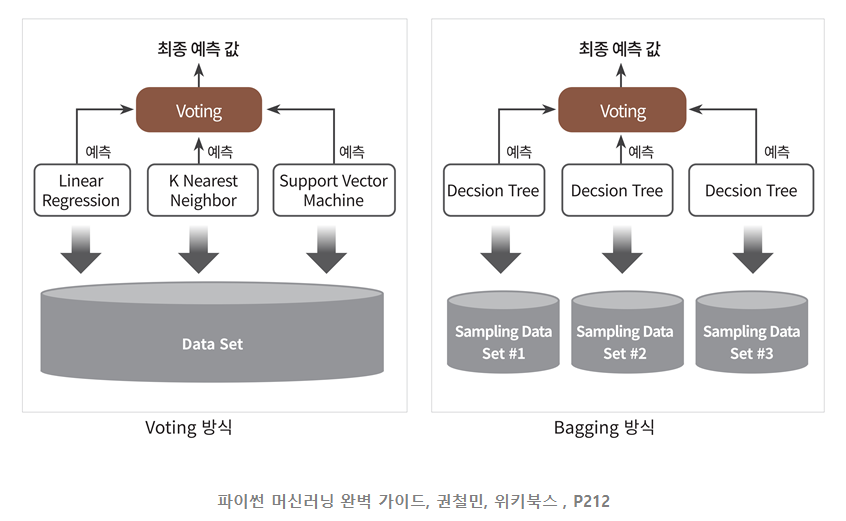

샘플링 방식 : 부트 스트래핑 분할 방식
- 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
- 각 샘플링된 데이터 내에는 중복 데이터 포함
- (교차 검증에서는 데이터 세트 간에 중복 허용하지 않음)

https://swalloow.github.io/bagging-boosting/

### 부스팅(Boosting)
- 여러 개의 분류기가 순차적으로 학습 수행하되
- 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 방식
- 예측 성능이 뛰어나 앙상블 학습 주도
- boost : 밀어 올림
    
**대표적인 부스팅 모듈**
- Gradient Boost
- XGBoost(eXtra Gradient Boost)
- LightGBM(Light Gradient Boost)

#### 보팅 유형
- 하드 보팅
- 소프트 보팅

#### 하드 보팅 (Hard Voting)
- 다수결 원칙과 유사
- 예측한 결과값들 중에서 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정

#### 소프트 보팅 (Soft Voting)
- 분류기들의 레이블 값 결정 확률을 평균내서 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
- 일반적으로 소프트 보팅이 예측 성능이 좋아서 더 많이 사용

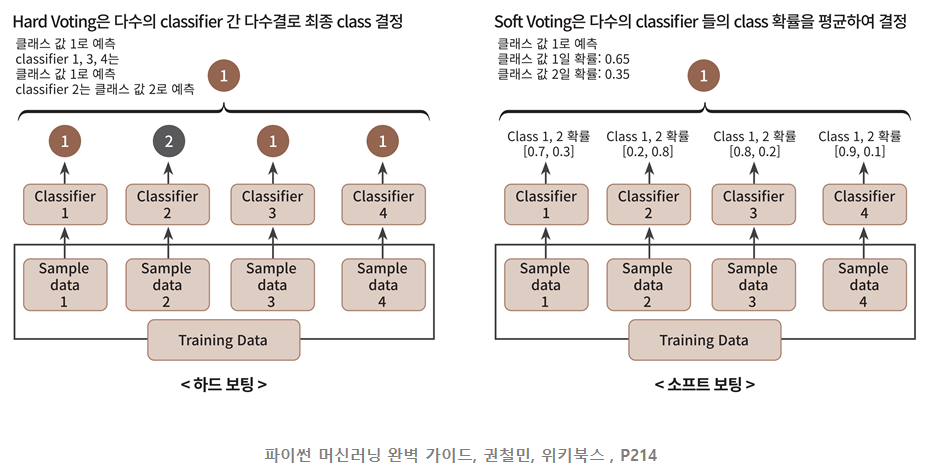

### Voting Classifier

### 보팅 방식의 앙상블 예제 : 위스콘신 유방암 데이터 세트 예측 분석  
위스콘신 유방암 데이터 세트
- 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트
- 종양의 크기, 모양 등의 형태와 관련한 많은 피처 포함
- 사이킷런의 보팅 양식의 앙상블을 구현한 VotingClassifier 클래스를 이용해서 보팅 분류기 생성  
- load_breast_cancer() 함수를 통해 위스콘신 유방암 데이터 세트 생성
- 로지스틱 회귀와 KNN 기반으로 소프트 보팅 방식으로 보팅 분류기 생성

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 준비

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- 개별 모델 : 로지스틱 회귀 / KNN


**학습/예측/평가 후 성능 비교**

로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 방식을 기반으로 하되
- 시그모이드 함수를 이용해 분류 수행

K- 최근접 이웃 알고리즘 (K-Nearest Neighbor) 
- 가장 직관적이고 간단
- 주변의 더 많은 데이터 범주로 분류하는 방식

In [4]:
## 1. 개별 모델 객체 인스턴스 생성
lr_clf = LogisticRegression(solver='liblinear') ##solver :  최적화 문제에 사용하는 알고리즘
knn_clf = KNeighborsClassifier(n_neighbors=8)

VotingClassifier 클래스의 주요 생성 인자
- estimators : 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음
    - [('LR', lr_clf), ('KNN', knn_clf)]
- voting : 보팅 방식 - hard/soft (디폴트 : hard)

In [5]:
## 2. 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 인스턴스 생성
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

In [6]:
## 3. 학습 (데이터세트 분리)

# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                        test_size=0.2 , random_state= 156)

# 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)

print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))


VotingClassifier(estimators=[('LR', LogisticRegression(solver='liblinear')),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

Voting 분류기 정확도: 0.9561


In [7]:
# 로지스틱 회귀와 KNN 각 개별 모델로 학습/예측/평가
classifiers = [lr_clf, knn_clf] #반복문 사용


for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__  # __class__ : 클래스명  # __name__ : 클래스명 추출
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))


LogisticRegression(solver='liblinear')

LogisticRegression 정확도: 0.9474


KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier 정확도: 0.9386


### 결론 - 보팅을 통해서 개별 모델등을 합치면 좋아질 수 있는 가능성이 있고, 모델 방향을 선택할 수 있음

## 배깅(Bagging) 학습 유형
- 대표적인 알고리즘 : 랜던포레스트 알고리즘
    - 모델로 결정트리 모델을 사용함
        - 결정트리 : 쉽고 직관적인 분류 기준을 갖고 있음
            - 단점 : 데이터를 과하게 학습 - 과적합
    - 결정트리 수십개 ~ 수천개의 많은 분류기를 결합해 다양한 상황을 학습하게 해서 과적합의 단점을 극복하고 있음

### Random Forest
- 앙상블 알고리즘 중 수행속도가 빠름
- 다양한 영역에서 높은 예측 서능을 보임
- 기반 알고리즘 : 결정트리

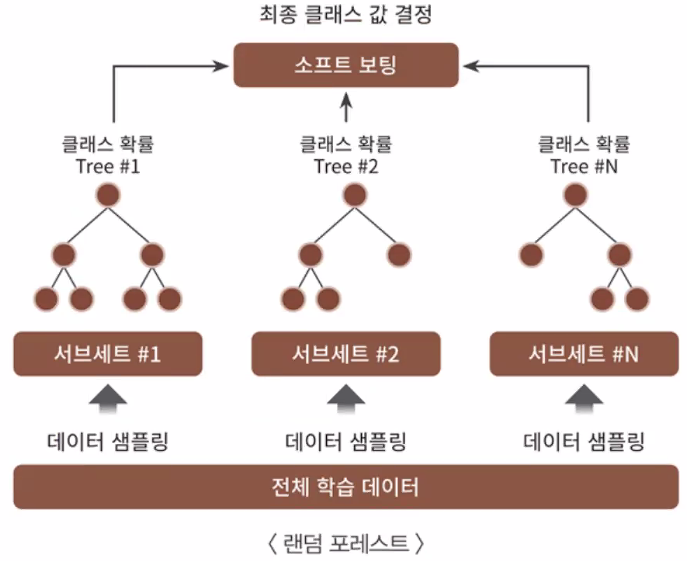

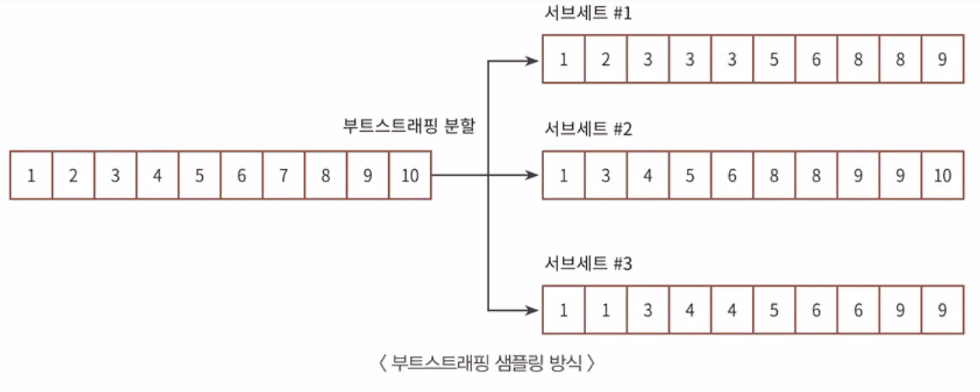

## 랜덤 포레스트 예제
- 앞의 사용자 행동 인식 데이터 세트를 
- 사이킷런의 RandomForestClassifier 클래스를 이용해 예측 수행



**결정 트리에서 사용한 사용자 행동 인지 데이터 세트 로딩**

In [8]:
# 피처명 변경해서 반환하는 과정을 함수로 작성
# 피처명_1 또는 피처명_2로 변경
# groupby('column_name').cumcount() : 중복되는 값이 몇 번째에 해당되는지(index) 반환
# 0이면 첫 번째, 1이면 두 번째, ...

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [9]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])



    y_test = pd.read_csv('./data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = get_human_dataset()

**램덤포레스트 이용 학습/예측/평가**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [12]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))


RandomForestClassifier(random_state=0)

랜덤 포레스트 정확도: 0.9253


### 결과 - 정확도는 향상되었지만 수행속도가 좋은편이 아님

**GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝**
- 앞의 사용자 행동 데이터 세트 그대로 사용
- 튜닝 시간을 절약하기 위해 
    - n_estimators=100
    - cv=2

n_estimators : 결정 트리의 개수. 디폴트 10
- 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 무조건 향샹되는 것은 아님
- 증가시킬수록 학습 수행 시간이 오래 걸림

In [26]:
from sklearn.model_selection import GridSearchCV

# 테스트해 볼 데이터를 많이 넣으면 기하급수적으로 늘어난다
params = {
    'n_estimators':[100], # 1차적으로 100으로 줄이고,나중에 최적화 되면 늘려서 최종적으로 예측 수행
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]  # 4x3x3 : 36번
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1) 
# n_jobs=-1 : 전체 cpu 콜을 다 활용하라는 거고
# n_jobs=-1 를 사용하면 개인 pc가 굉장히 많은 수행 성능을 잡아 먹기 때문에 느려짐
# 수행하면 한 2분 걸림
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 ) 
# cv 2개 : 너무 많이 하면 실행시간이 오래걸리니까 (총 72번 수행 : 36 x 2)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


#### 튜닝된 하이퍼 파라미터로 재학습/예측/평가 - 분류기 수를 확장

In [13]:
# n_estimators=300
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=300, random_state=0)

예측 정확도: 0.9165


In [28]:
# n_estimators=1000
rf_clf1 = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=1000, random_state=0)

예측 정확도: 0.9196


### 개별 feature들의 중요도 시각화

- feature_importance_ 속성을 이용해서 피처 중요를 알 수 있음

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Feature importances Top 20')

<AxesSubplot:title={'center':'Feature importances Top 20'}>

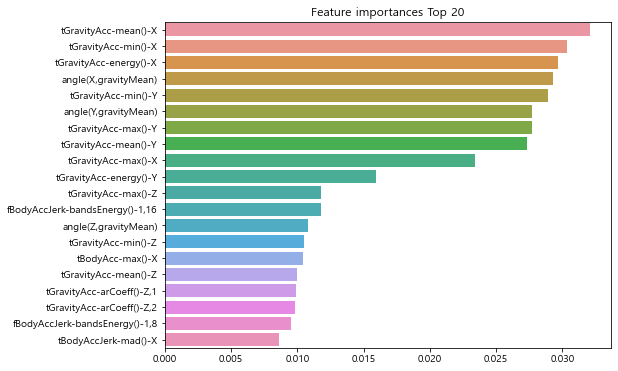

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 앞으로 계속 중요도 시각화를 죽 계속할 건데 이 코드를 계속 비슷하게 사용한다고 생각하면 됨
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()


# GBM(Gradient Boosting Machine)

부스팅(Boosting)
- 학습기(weak learner)를 순차적으로 학습/예측하면서 잘못 예측한 데이터에 가중치(weight) 부여해서 오류를 개선하는 학습 방식
    - GBM
    - AdaBoost
    - 내용추가 필요

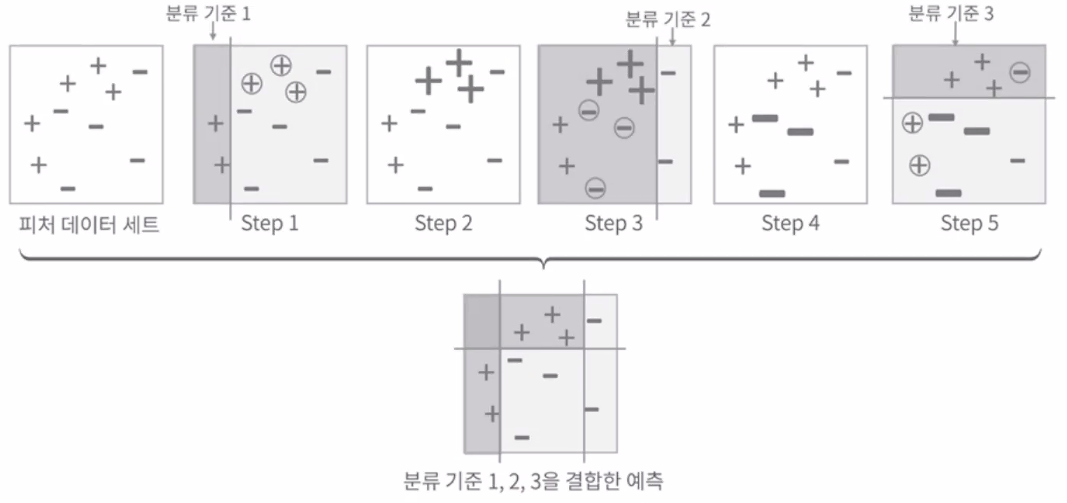

## GBM(Gradient Boosting Machine) : 그래디언트 부스트
- 에이다 부스트와 유사하지만 가중치 업데이터를 경사 하강법을 이용하는 것이 큰 차이
    - 반복 수행을 통해 오류를 최소화할 수 있도록
    - 가중치의 업데이트 값을 도출
    - 오류값 = 실제값 - 예측값
- 분류와 회귀 둘 다 가능

경사 하강법(Gradient Descent)
- 함수의 기울기(경사)를 구하고 경사의 절대값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복시키는 것(위키백과)
- 제시된 함수의 기울기로 최소값을 찾아내는 머신러닝 알고리즘
- 매개변수를 반복적으로 조정해서 최소 함수값을 갖게하는 독립변수를 찾는 방법

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset() # 데이터 생성 사용자 정의 함수(위 코드에 생성되어 있음)

In [32]:
# GBM 수행 시간을  측정하기 위한 time() 객체 생성
start_time = time.time()

In [34]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train) # 학습
pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GradientBoostingClassifier(random_state=0)

GBM 정확도: 0.9389
GBM 수행 시간: 461.4 초 


### 결과
- 랜덤포레스트보다 GBM이 예측 성능이 조금 더 뛰어난 경우가 많음
- 단점 : 수행시간이 오래 걸림, 하이퍼 파라미터가 랜덤포레스트보다 많고 튜닝 노력도 더 필요
         병렬지원을 하지 않기 때문에 대용량 데이터인 경우 학습시간이 많이 상승하게 됨

## GBM 하이퍼 파라미터 및 튜닝

### GBM의 주요 하이퍼 파라미터  

**`loss`** : 경사 하강법에서 사용할 비용 함수 지정. 기본값은 'deviance'
    
**`n_estimators`** : weak learner의 개수. 기본값 100
- weak learner가 순차적으로 오류를 보정하므로
- 개수가 많을수록 예측 성능이 일정 수준까지 좋아질 수 있음
- 그러나 개수가 많을 수록 시간이 오래 걸림

**`learning_rate`** : GBM이 학습을 진행할 때마다 적용하는 학습률
- weak learner가 순차적으로 오류값을 보정해 나가는 데 적용하는 계수
- 0 ~ 1 사이의 값 지정 (기본값 0.1)
- 작은 값을 적용하면 업데이트 되는 값이 작아져서
    - 최소 오류 값을 찾아 예측 성능이 높아질 가능성은 높지만
    - 많은 weak learner의 순차적인 반복 작업에 수행 시간이 오래 걸림
- 너무 작게 설정하면 모든 weak learner의 반복이 완료되어도
    - 최소 오류값을 찾지 못할 수도 있음
- 반대로 큰 값을 적용하면 최소 오류값을 찾지 못하고 그냥 지나쳐 버려
    - 예측 성능이 떨어질 가능성이 높아지지만 빠른 수행은 가능

**`subsample`** : weak learner가 학습에 사용하는 데이터의 샘플링 비율
- 기본값 1 : 전체 학습 데이터를 기반으로 학습한다는 의미
- 0.5 : 학습 데이터의 50%
- 과적합이 염려되는 경우 1보다 작은 값으로 설정


In [35]:
# GridSearchCV 이용해서 하이퍼 파라미터 최적화
# 사용자 행동 데이터 세트 정도의 데이터 양에
# 많은 하이퍼 파라미터로 튜닝하게 되면 시간이 상당히 오래 걸림
# 간략하게 n_estimators와 learning_rate만 적용

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 500]},
             verbose=1)

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9011


**위에 결과값**
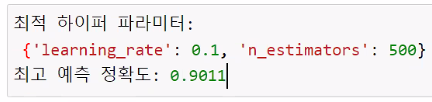
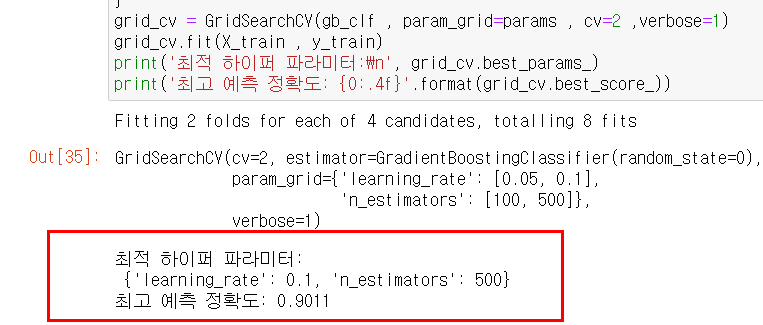

In [36]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 
# 테스트 데이터 세트에 적용해서 예측 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

# 결과
# 테스트 데이터 세트에서 약 96.06 % 정확도 도출


GBM 정확도: 0.9420


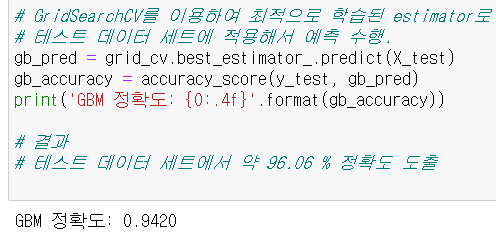


### 결론
- GBM은 수행시간이 오래 걸린다는 단점이 있지만 과적합에는 강해서 예측서능이 뛰어난 알고리즘
- 많은 알고리즘이 GBM을 기반으로 새롭게 만들어지고 있음
    - 머신러닝 세계에서 가장 각광을 받는 boosting 알고리즘 2개가 GBM에 기반함
        - XGBoost
        - LightGBM